##### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 6. ML - Algoritmes d’aprenentatge supervisat: Regressió**

### Tasca M6 T01 - Exercicis Python a partir d'un dataset amb informació sobre les vivendes de las afores de Boston

**Objectius**
* Neteja i interpretació de les dades
* Preprocessats
* Creació de models de regressió (arbres de regressió, random forest, xarxes neuronals, altres models...)
* Utilització de les mètriques per interpretar els resultats
* Estudi i modificació de paràmetres

___________
Lliurament: Enviar l'URL a un repositori anomenat *ML_regressions* que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.

URL : **https://github.com/CristinaCosma/ML_regressions** 
___________

### 0. Importamos las librerías necesarias, cargar el dataset y preprocesar los datos 

In [387]:
# cálculos, dataframes, uso genereal
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento de datos,test de hipótesis
from scipy.stats import shapiro
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

# ML : modelos de predicción, regresiones
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# métricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_fscore_support as score

import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston


In [388]:
data = load_boston()
data.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [389]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [727]:
features = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target)
target.rename(columns={target.columns[0]:'MEDV'}, inplace=True)

X = features
y = target


boston = pd.concat([features, target], axis=1)
boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Resumen estadístico del dataset *Boston Housing Data*** :


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [114]:
# Vemos los valores únicos de cada uno de los atributos
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [115]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [116]:
# Comprobamos si hay campos con valor núlo
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [732]:
boston.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [733]:
boston.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [113]:
boston.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


**FEATURES : Visualización de los conjuntos de datos originales y transformados que irán en los modelos**
* Los valores son dispersos y en varios rangos, destacando particularmente las colunas TAX y B.

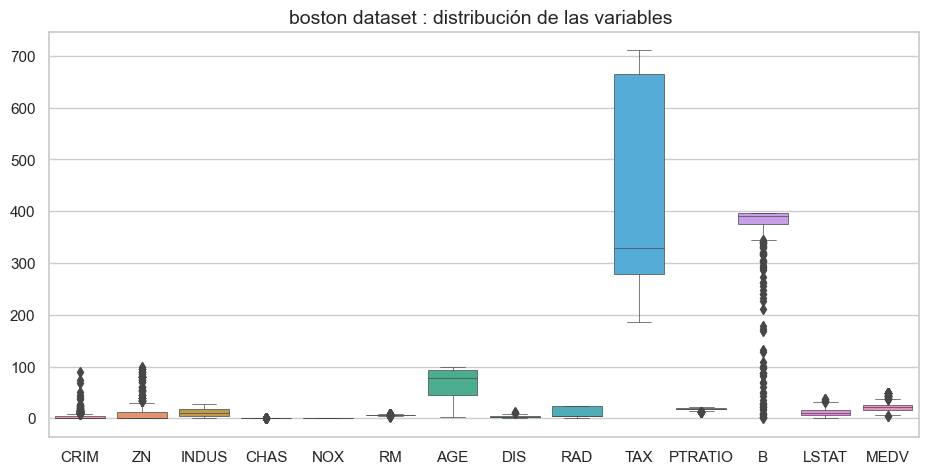

In [394]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data = boston, linewidth= 0.5)
plt.title('boston dataset : distribución de las variables ', fontsize=14)
plt.show()

**TARGET : Visualización del conjunto de datos que representa el precio en miles de dólares.**
* Vemos que los valores son muy dispares, el minimo siendo diez veces menos que el máximo. 

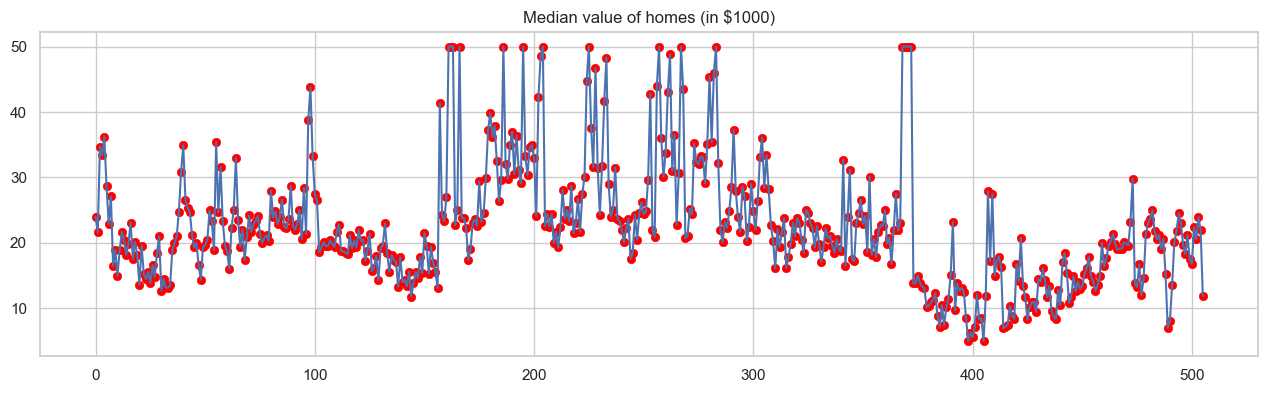

In [355]:
plt.figure(figsize=(14,4))
plt.scatter(boston.index, boston["MEDV"],color="red", linewidth= 0.5)
plt.plot(boston.index, boston["MEDV"])
plt.title("Median value of homes (in $1000)")
plt.grid(True)
plt.show()

* Miramos como se **distribuye cada variable y sus outliers**, para determinar los posibles escalados en el preprocesamiento de los datos : 

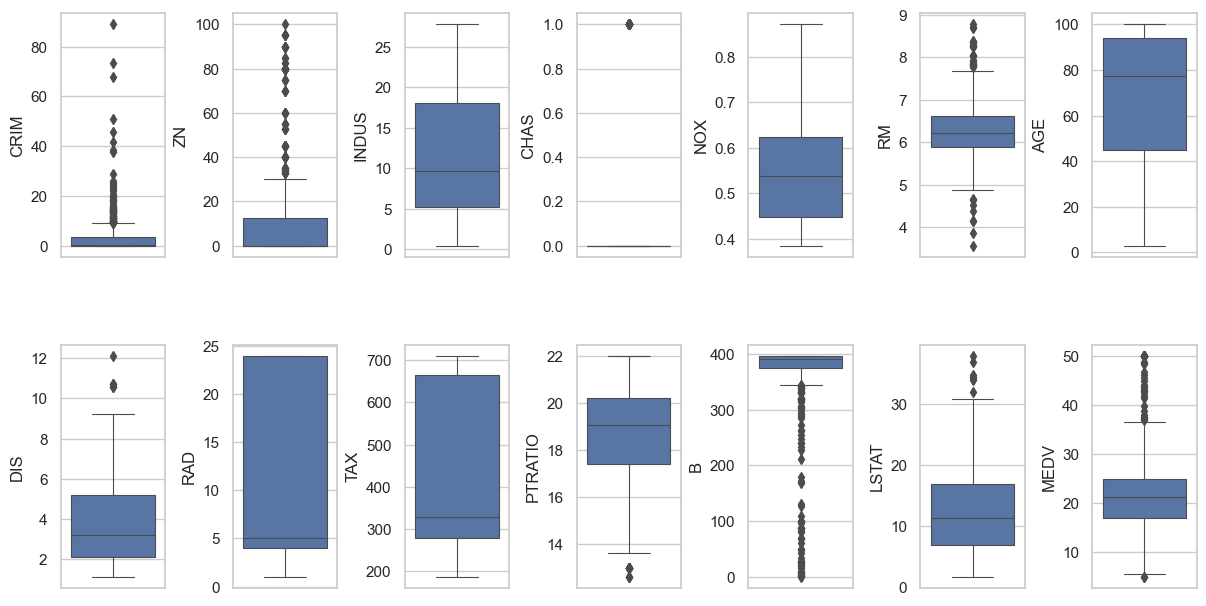

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [358]:
# bloques de distribución y outliers

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index], linewidth= 0.8)
    sns.set(style= "whitegrid")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

**CORRELACIÓN : Visualización de la correlación interna entre las variables del conjunto para ver como se influyen entre ellas**
* El siguiente paso es muy importante ya que trazaremos la correlación absoluta de cada característica de entrada con la característica de salida (MEDV)

* **Para sacar conclusiones, hay que saber que** :
    - En la época de la encuesta aún había mucho diesel en Estados Unidos y los vehículos eran grandes y de altísimo consumo 
    - No hay restricciones sobre la circulación y los trailers podían y aún pueden entrar en cualquier zona de la ciudad, sea residencial, comercial o industrial
    - Las casas hasta los años 50 se han edificado sobre las principales vías de las ciudades, mientras que a partir de los años 60-70, las zonas residenciales se han ido edificando en núcleos más alejados, buscando paz e intimidad y las grandes arterias se quedaron para los comercios, equipamientos, industrias o las grandes torres de pisos. 
    

* **Se observa una fuerte correlación positiva entre** :
    - "NOX" e "INDUS" : concentración de óxidos nítricos y proporción de acres de negocios no minoristas por ciudad, lo que indica que las zonas donde existen negocios no minoristas pueden estar más contaminadas por los gases que provienen de los vehículos, sobretodo de coches y camiones / traileres diesel (en la época de la encuesta aún había mucho diesel en Estados Unidos y los vehículos eran grandes y de altísimo consumo).
    - "NOX" y "TAX" : concentración de óxidos nítricos y porcentaje de impuesto a la propiedad sugiere que en las zonas más concurridas por los vehículos se pagan más impuestos por superfície
    - "INDUS" y "TAX" : a mayor proporción de acres de negocios no minoristas por ciudad, mayor porcentaje de impuesto a la propiedad (como en la observación anterior) 
    - "NOX" y "AGE" : concentración de óxidos nítricos y proporción de unidades de viviendas ocupadas por sus propietarios construidas antes de 1940 indica que donde las casas son más antiguas y en régimen de propiedad,es en las zonas más concurridas y a la vez, más contaminadas.
    - "ZN" y "DIS" : proporción de terreno residencial zonificado en lotes de más de 25,000 pies cuadrados (pueden ser bloques de pisos, o casas con grandes terrenos) y distancias ponderadas a cinco centros de empleo en Boston.
    
    
* **Se observa una fuerte correlación negativa entre** :
    - DIS y NOX : distancias ponderadas a cinco centros de empleo en Boston y concentración de óxidos nítricos, por lo que cuanto más alejadas están las viviendas de los centros de empleo, más calidad de aire disfrutan en sus casas ; cuanto más cerca, más NOX y peor calidad de aire
    - DIS y INDUS : distancias ponderadas a cinco centros de empleo en Boston y suelo industrial o de comercio mayorista viene a decir que cuando nos alejamos de los 5 centros de empleo de Boston, la proporción de parcelas grandes disminuye, pero que estando cerca de estos polos de empleo, nos encontramos muchas.
    - DIS y AGE : distancias ponderadas a cinco centros de empleo en Boston y propietarios viviendo en casas de antes del 1940 nos indica una parte importante de las casas antiguas y situadas cerca de los polos de empleo resultan interesantes para los porpietarios, o que a mucha gente le interesa vivir cerca de trabajo y servicios.
* **NO se observan correlaciones fuertes** entre RM (promedio de habitaciones por vivienda), PTRATIO (relación alumno-maestro por ciudad), LSTAT ( % de estatus socioeconómico bajo de la población) y las demás variables.
* Se observa que B (proporción de gente negra) está en muchos casos, incluso para la tasa criminal, en una correlación neutra o negativa con las otras variables.

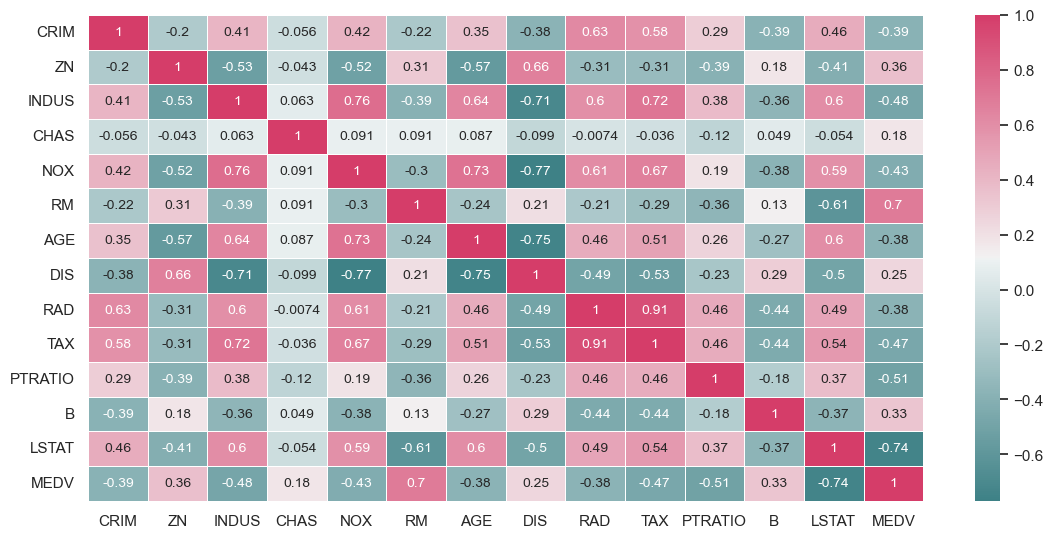

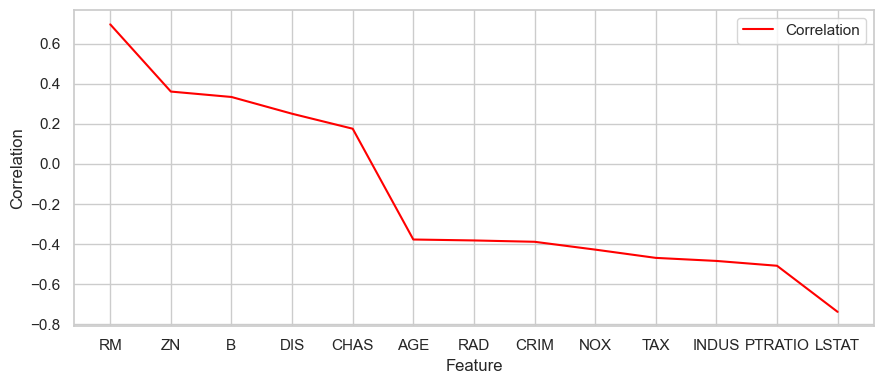

In [373]:
plt.figure(figsize=(12,6))
corr = boston.corr()
#corr=abs(data.corr())
cmap = sns.diverging_palette(200, 0, as_cmap=True)
sns.heatmap(corr, annot=True,  annot_kws={"fontsize": 10}, linewidth= 0.5, cmap=cmap)
plt.show()

plt.figure(figsize=(9, 4))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:],label="Correlation", color="red") # graf de línea
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

* Trazaremos los **gráficos de regresión** para observar y comprender si las variables con mayor correlación observada con la variable de salida (el precio) tienen correlación positiva o negativa.

* Vemos que de las características **LSTAT, RM, PTRATIO, INDUS y TAX  tienen la mayor correlación con el valor medio de las viviendas MEDV**, donde solo la **RM tiene una correlación positiva con el MEDV**, mientras que las otras características tienen una correlación negativa. Sin embargo, las diferentes variables también pueden tener correlación entre ellas, como la tiene TAX (impuestos sobre bienes inmobiliarios) con INDUS o RAD.

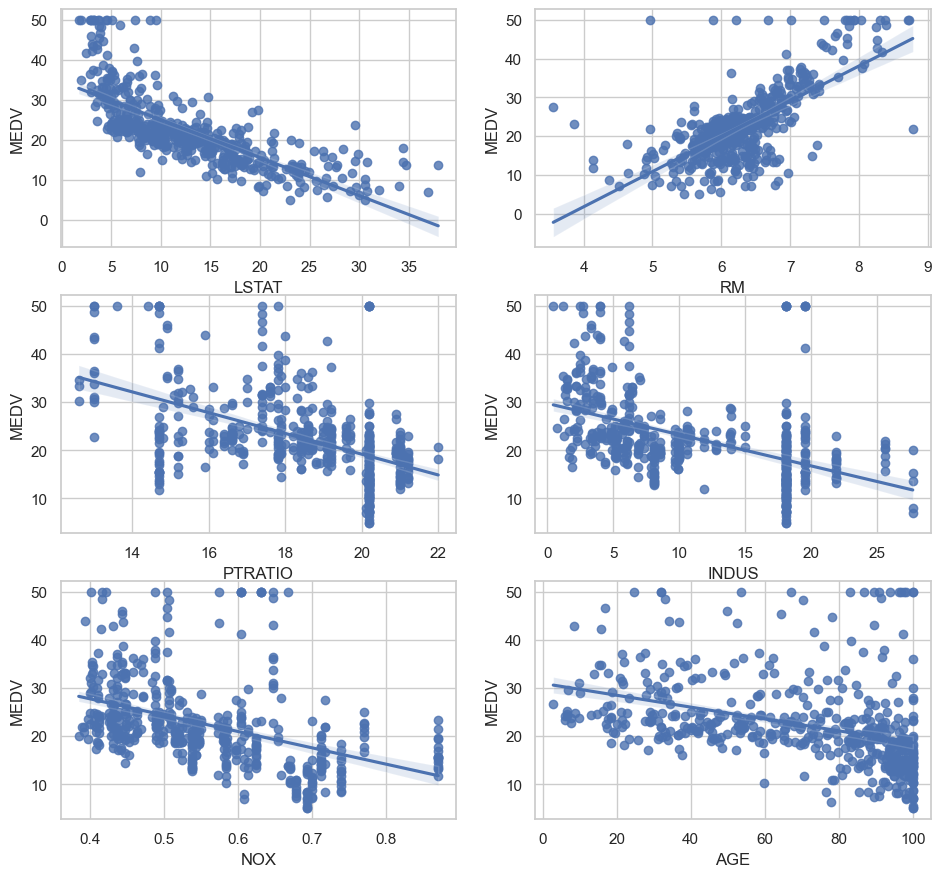

In [737]:
fig, ax1 = plt.subplots(3,2, figsize=(10, 10))
k = 0
columns = ["LSTAT","RM","PTRATIO","INDUS","NOX","AGE"]
for i in range(3):
    for j in range(2):
            sns.regplot(boston[columns[k]], boston["MEDV"],ax=ax1[i][j])
            sns.set(style= "whitegrid")
            ax1[i][j].grid(True)
            k += 1
plt.show()

#### **Partir el conjunto de datos en train i test.**

**Importamos la función *train_test_split* de la librería *sklearn.model_selection* y preparamos el split:**

* **X=>"features"** (input) : usaremos todas las columnas menos la última,  es decir, es información sobre vivienda y las características de su entorno
* **y=>"target"** (output) : usaremos solamente la última columna, que es la del precio de las viviendas en miles de dólares

**Separar el dataset en TRAIN y TEST antes de aplicar los diferentes modelos de machine learning**

Para hacer regresiones y otros modelos de predicción, tenemos la opción de rehacer o importar el trabajo previo (Sprint 5.2), o bien trabajar con los datos de los **train features (X)** previamente normalizados al haber usado el método **"scale()"**. En el segundo caso, no necesitaríamos efectuar más preparativos ni aplicar otros parámetros con este algorítmo. Dado que el conjunto de datos inicial que tenemos los tiene muy dispersos, se aplicará el algorítmo **scale()** a los datos de entrenamiento (X) para preprocesar los datos y que estén listos para realizar regresiones con ellos. Este algoritmo preprocessing.scale() y scale() reúne los datos en una misma escala.  

El problema con la dispersión es que está muy sesgada, pero el escalado de los datos reúne todos los valores en una sola escala, lo que disminuye mucho su dispersión. A nivel matemático, es un concepto parecido a la Normalización y la Estandarización.

El parámetro aleatorio **"shuffle"** es necesario para evitar la asignación no aleatoria al conjunto de entrenamiento y prueba. Con **shuffle=True** se dividen los datos aleatoriamente, intesesante también con datos de clasificación binaria equilibrados y que están ordenados por etiquetas.

Finalmente, **"stratify"**, o el parámetro de estratificación realiza una división de modo que la proporción de valores en la muestra producida será la misma que la proporción de valores proporcionada para estratificar el parámetro.

Por ejemplo, si la variable y es una variable categórica binaria con valores 0 y 1 y hay un 25% de ceros y un 75% de unos, stratify=y se asegurará de que la división aleatoria tenga un 25% de 0 y un 75% de 1.



In [805]:
data = load_boston()

In [806]:
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(data.data), columns=data.feature_names)
y = data.target


In [807]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True, stratify=X['CHAS']>0, test_size=0.2, random_state=2)

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13)

(404,)

(102, 13)

(102,)

**FEATURES : Visualización de los conjuntos de datos originales y transformados que irán en los modelos**

* Veamos como se ha escalado el conjunto de variables independientes (X -> features) para que los valores se situen en rangos más parecidos.
* El conjunto de variables dependientes (Precio -> y) ha de quedar igual, no los escalamos. Tras la separación, los gráficos muestran que en ambos casos,  la distribución ha quedado muy fiel al original. 

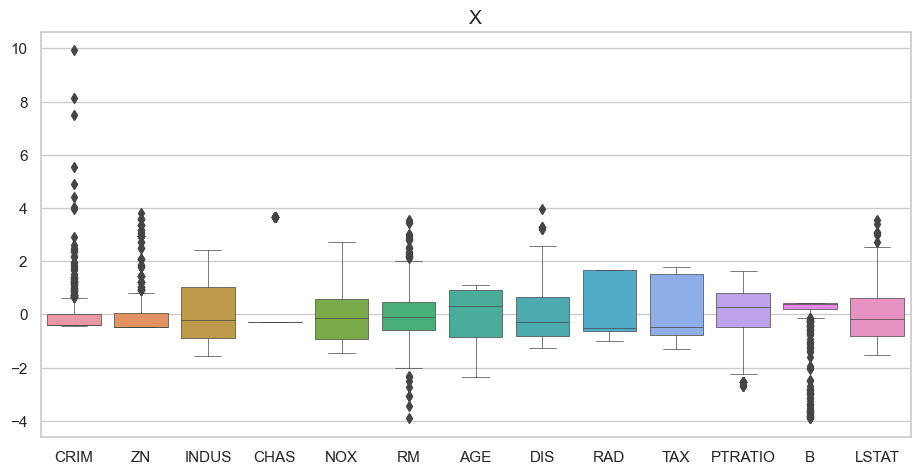

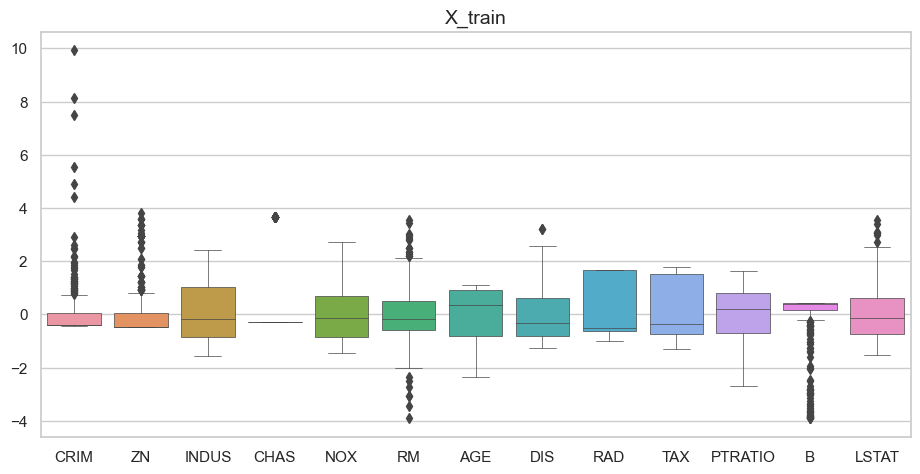

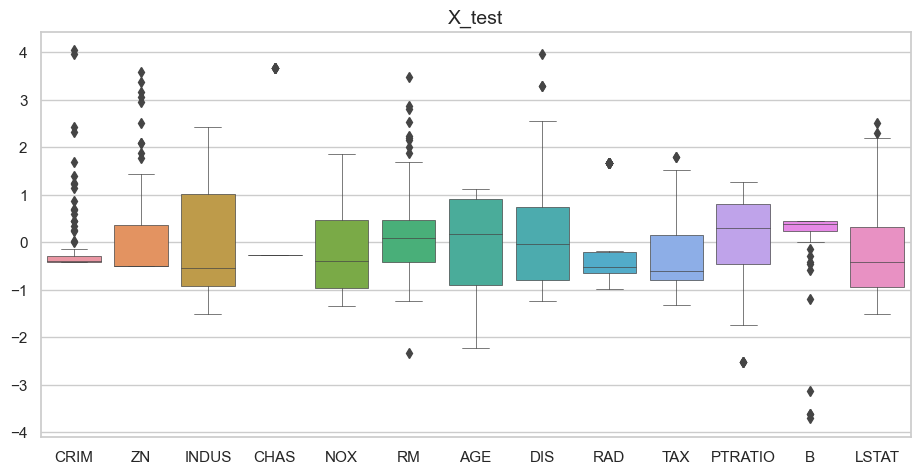

In [681]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data= X, linewidth= 0.5)
plt.title('X', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=X_train, linewidth= 0.5)
plt.title('X_train', fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=X_test, linewidth= 0.5)
plt.title('X_test', fontsize=14)
plt.show()

**TARGET : Visualización de los conjuntos de datos originales y transformados que irán en los modelos**

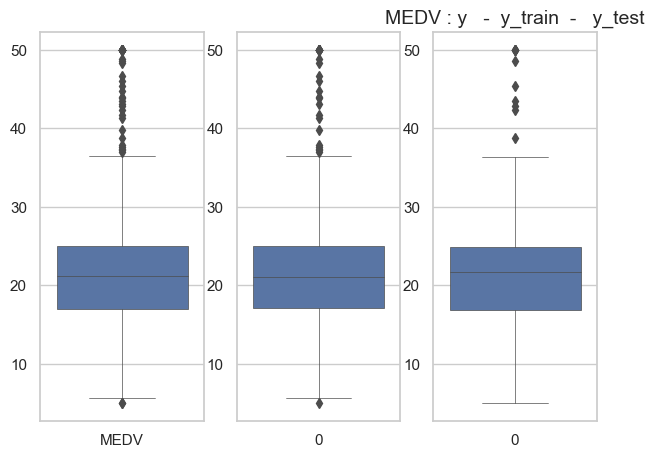

<Figure size 800x400 with 0 Axes>

In [739]:
f, axes = plt.subplots(1, 3)
plt.title('MEDV : y   -  y_train  -   y_test', fontsize=14)
plt.figure(figsize=(8,4))
sns.boxplot(data=y, linewidth= 0.5, orient='v', ax=axes[0])
sns.boxplot(data=y_train, linewidth= 0.5, orient='v', ax=axes[1]) 
sns.boxplot(data=y_test, linewidth= 0.5, ax=axes[2])
plt.show()

In [ ]:
# creamos dataset y columna de los labels sin la variable RM (# de habitaciones) en previsión para el Exercicio 5.

_boston = boston.drop(['RM'], axis = 1) 
#X = X_dropRM
_boston

_X = X.drop(['RM'], axis = 1) 
_y = boston['MEDV']


________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Exercici 1 
### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV).


**Importar, ajustar, predecir, visualizar y medir el rendimiento de un modelo**

### **1.A) LINEAR REGRESSION**

La regresión es una clase en Scikit-Learn que hace parte del módulo linear_model. En este caso, tenemos la opción de rehacer o importar el trabajo previo (Sprint 5.2), o bien trabajar con los datos de los **train features (X)** previamente normalizados al haber usado el método **"scale()"**. 

Como el algoritmo ya está esccalado y ajustado, podemos obtener directamente el **coeficiente de determinación, o valor de R2 con el método "score"**.

In [628]:
from sklearn.linear_model import LinearRegression

# cargamos el modelo, hacemos el ajuste
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

# making predictions on the test data (plot)
predicted_l_reg = l_reg.predict(X_test)
expected = y_test

# calculamos la exactitud del modelo, qué tanto se ajusta a la realidad del rendimiento que le pedimos.
accuracy_TRAINING_l_reg = l_reg.score(X_train, y_train).round(2)*100
accuracy_TESTING_l_reg = l_reg.score(X_test, y_test).round(2)*100
print('Precisión del TRAINING con Regression Linear : ',l_reg.score(X_train, y_train).round(2)*100)
print('Precisión del TESTING con Regression Linear : ', l_reg.score(X_test, y_test).round(2)*100)


Precisión del TRAINING con Regression Linear :  72.0
Precisión del TESTING con Regression Linear :  78.0


### **1.B) RANDOM FOREST REGRESSOR**

Random Forest Regressor es un algoritmo de aprendizaje automático que utiliza un conjunto de árboles de decisión para realizar tareas de regresión. Ajusta una serie de árboles en diferentes submuestras de los datos y promedia sus predicciones para mejorar la precisión y evitar el sobreajuste, o overfitting. El tamaño de la submuestra y el número de árboles se pueden controlar mediante parámetros. Es una técnica flexible y fácil de usar que también puede ser utilizada para la clasificación.

En el aprendizaje automático funcionan bien en conjuntos de datos grandes y complejos. Pueden dar un alto ratio de precisión y podemos mejorar aún más estos resultados.



In [629]:
from sklearn.ensemble import RandomForestRegressor

# cargamos el modelo, haciendo el ajuste en la misma línea 
r_forest = RandomForestRegressor(random_state = 3).fit(X_train, y_train)

# hacer predicciones sobre los datos del TEST, basandonos en el X_test
predicted_r_f = r_forest.predict(X_test)
expected = y_test

# calculamos la exactitud del modelo, qué tanto se ajusta a la realidad del rendimiento que le pedimos.
accuracy_TRAINING_r_forest = r_forest.score(X_train, y_train).round(2)*100
accuracy_TESTING_r_forest = r_forest.score(X_test, y_test).round(2)*100

print('Precisión del TRAINING con Random Forest Regression : ',r_forest.score(X_train, y_train).round(2)*100)
print("Precisión del TESTING con Random Forest Regression: ", r_forest.score(X_test, y_test).round(2)*100)

Precisión del TRAINING con Random Forest Regression :  98.0
Precisión del TESTING con Random Forest Regression:  89.0


### **1.C) XGBoost MODEL OPTIMIZATION REGRESSOR**

El algoritmo XGBOost es una implementación optimizada de este método Gradient Boosting. Tiene la mejor combinación de rendimiento de predicción y tiempo de procesamiento en comparación con otros algoritmos. 


In [809]:
import xgboost as xgb

# cargamos el modelo, haciendo el ajuste en la misma línea 
xgb = xgb.XGBRegressor(objective='reg:squarederror').fit(X_train, y_train)

# hacer predicciones sobre los datos del TEST, basandonos en el X_test
predicted_xgb = xgb.predict(X_test)
expected = y_test

# calculamos la exactitud del modelo, qué tanto se ajusta a la realidad del rendimiento que le pedimos.
accuracy_TRAINING_xgb = xgb.score(X_train, y_train).round(2)*100
accuracy_TESTING_xgb = xgb.score(X_test, y_test).round(2)*100

print('Exactitud deL TRAINING con XGBoost-Model Optimization. : ' , xgb.score(X_train, y_train).round(2)*100)
print("Exactitud del TESTING con XGBoost-Model Optimization: " , xgb.score(X_test, y_test).round(2)*100)

Exactitud deL TRAINING con XGBoost-Model Optimization. :  100.0
Exactitud del TESTING con XGBoost-Model Optimization:  91.0


### **Comparación de los resultados obtenidos**

In [631]:
# Compararmos los resultados
accuracy = pd.DataFrame(data = 
                          [['Linear Regression', accuracy_TRAINING_l_reg, accuracy_TESTING_l_reg], 
                           ['Random Forest Reg.', accuracy_TRAINING_r_forest, accuracy_TESTING_r_forest], 
                           ['XGBoost Regressor', accuracy_TRAINING_xgb, accuracy_TESTING_xgb]], 
                          columns = ['Modelo', 'Exactitud X_train', 'Exactitud X_test'])
accuracy.head().round(3)

,Modelo,Exactitud X_train,Exactitud X_test
0,Linear Regression,72.0,78.0
1,Random Forest Reg.,98.0,89.0
2,XGBoost Regressor,100.0,91.0


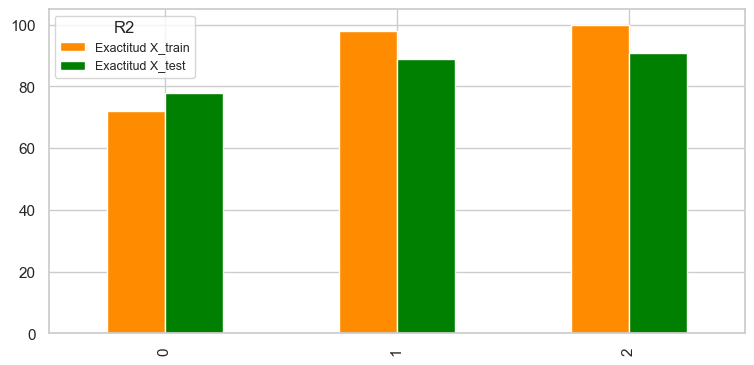

In [632]:
colors=['darkorange','green', 'purple']
labels=['Linear Regression', 'Random Forest Reg.', 'XGBoost']

accuracy.plot(kind="bar", figsize = (8,4), color=colors)
plt.legend(title="R2", loc="upper left", fontsize=9) 
sns.set(style= "whitegrid")
plt.show()


### **Visualización de los datos con cada modelo**

* Hacemos unos gráficos para visualizar el efecto de cada modelo sobre los precios (estimados vs reales) 
* Otro gráfico para ver qué tanto se ajusta cada modelo a los resultados deseados (testing)



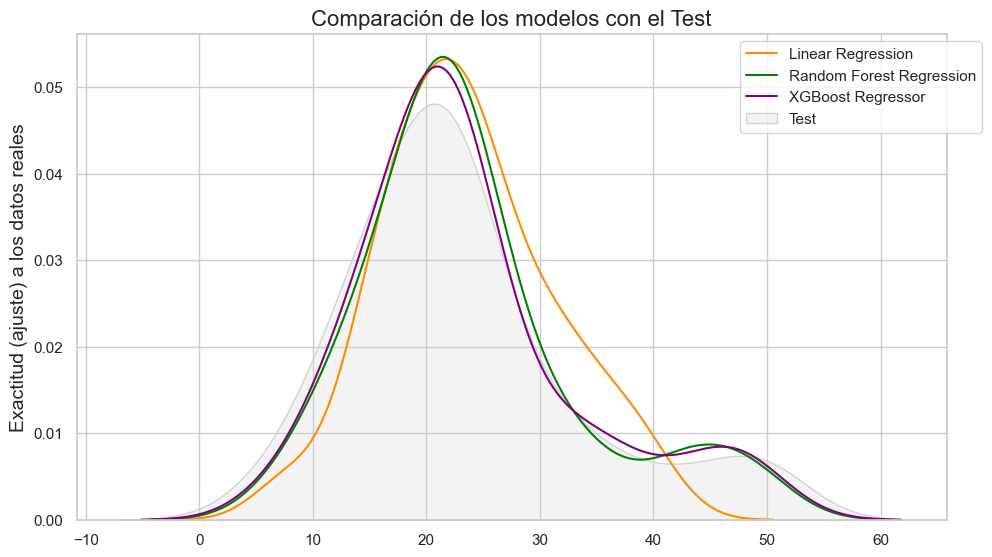

In [633]:
# ------------- Gráfico de precisión de los MODELOS EN CONJUNTO --------------

fig, ax = plt.subplots(figsize=(10,6))
sns.set(style= "whitegrid")
sns.kdeplot(predicted_l_reg, label='Linear Regression', color='darkorange', fill=False)
sns.kdeplot(predicted_r_f, label='Random Forest Regression', color='green', fill=False)
sns.kdeplot(predicted_xgb, label='XGBoost Regressor', color='purple', fill=False)
sns.kdeplot(y_test, label='Test', color="lightgrey", fill=True)
plt.title("Comparación de los modelos con el Test", fontsize = 16)
plt.ylabel('Exactitud (ajuste) a los datos reales', fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

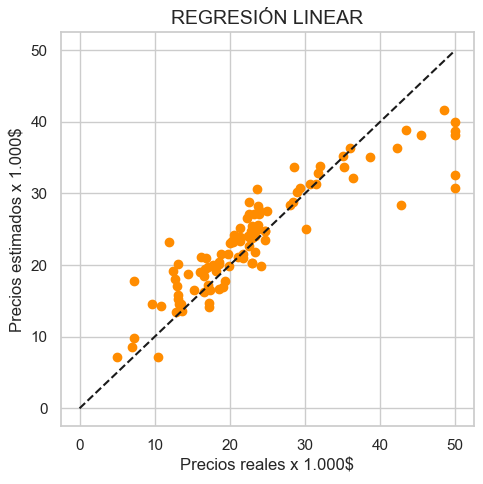

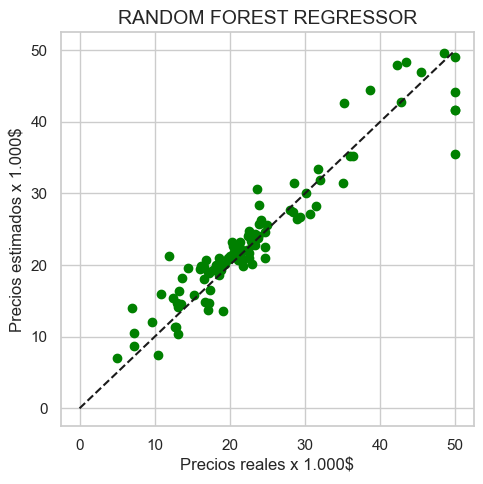

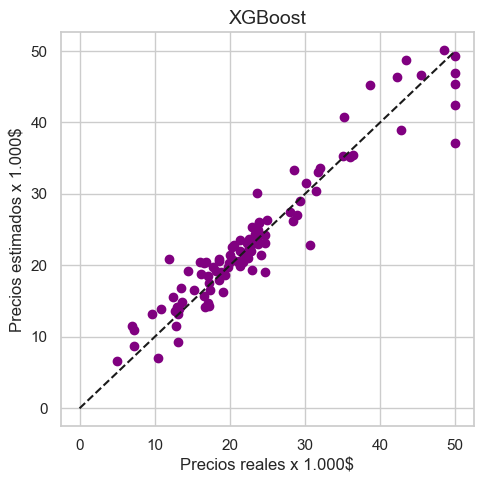

In [634]:
# -------------- Gráfico de la REGRESIÓN LINEAR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, predicted_l_reg, color='darkorange') 
plt.plot([0, 50], [0, 50], '--k')
plt.title("REGRESIÓN LINEAR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

# -------------- Gráfico de RANDOM FOREST REGRESSOR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, predicted_r_f, color='green')
plt.plot([0, 50], [0, 50], '--k')
plt.title("RANDOM FOREST REGRESSOR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

# ---------------- Gráfico de XGBoost --------------------------------- 
plt.figure(figsize=(5, 5))
plt.scatter(expected, predicted_xgb, color='purple')
plt.plot([0, 50], [0, 50], '--k')
plt.title("XGBoost", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

**Observaciones:**


En cuanto a los **gráficos de estimación de los precios**, podemos ver en todos los modelos que el sjute a la línea de tendencia es mejor en los 2/3 primeros que no hacia el final del rango, donde para muchos precios a partir de 40 k a 50k $, la estimación ya no es tan buena, quizás por tener menos items para valorar en esta franja que se salen de la tendencia y hacer que los modelos tengan dificultad para ajustarse, especialmente en el caso de **Regresión Linear**.

Sobre la **precisión y ajuste de los modelos**, como podemos ver, **Random Forest Regressor** y sobretodo **XGB Optimization Regressor** son los modelos de regresión que mejor se ajustan a la distribucióon de los datos reales del y_test. El modelo XGB Optimization Regressor, que como su nombre lo indica, es un modelo optimizado, da resultados de precisión de 91 en el conjunto de datos de testing y hasta 100 en en el conjunto de datos de training. La **Regresión Linear** da unos resultados bastante buenos con 72 en testing y 78 en training, pero teniendo en cuanta que se trata de estimar precios de vivienda, puede ser que compradores, vendedores o inversores consideren que las estimaciones que vayan a resultar no sean suficientemente precisas y habría que mejorar el modelo o utilizar otros.


________________________________________________________________________________________________________________________________________________________________________________________________________________________
# Exercici 2
### **Compara els dos models de regressió en base al MSE i al R2.**

La evaluación de modelos en la ciencia de datos ayuda a comprender el rendimiento del modelo y facilita la presentación del modelo a otras personas. A diferencia de la clasificación, la precisión en un modelo de regresión es un poco más difícil de ilustrar. 
Es imposible predecir el valor exacto, sino qué tan cerca está su predicción del valor real. Hay 3 métricas principales para la evaluación del modelo en regresión:

**Coeficiente de determinación, o Valor R2** : 

El **coeficiente de determinación**, también llamado **valor R2**, se utiliza para evaluar el rendimiento de un modelo de regresión lineal. 
Es la cantidad de la variación en el atributo dependiente de la salida que es predecible a partir de la entrada independiente 
variable(s). Se utiliza para comprobar qué tan bien se reproducen los resultados observados por el modelo.
La mejor puntuación posible es 1,0 y puede ser positiva o negativa.

**Mean Squared Error (MSE)** : 

Significa **Error cuadrático medio**. Es una métrica estadística que mide el promedio de los cuadrados de los errores 
entre los valores estimados y el valor real. El MSE es una función de riesgo que corresponde al valor esperado 
de la pérdida de error al cuadrado. Se utiliza para evaluar la calidad de un estimador y se deriva del cuadrado de Euclidean 
Distancia 1. 

El MSE es siempre un valor positivo que disminuye a medida que el error se acerca a cero.
Por ejemplo, si tenemos un conjunto de puntos y una línea de regresión, el MSE nos dice qué tan cerca está la línea de regresión 
a los puntos tomando las distancias desde los puntos hasta la línea de regresión (estas distancias son los "errores") 


In [682]:
# Cargamos la medida MSE para evaluar los modelos 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

### **2.A) LINEAR REGRESSION**

In [683]:
# R2
r2_l_reg = r2_score(expected, predicted_l_reg)

# MSE
mse_l_reg = mean_squared_error(expected, predicted_l_reg)
print('R2 Linear regression :', r2_l_reg.round(3)) 
print('MSE Linear regression :', mse_l_reg.round(3))


R2 Linear regression : 0.777
MSE Linear regression : 23.729


### **2.B) RANDOM FOREST REGRESSOR**

In [684]:
# R2
r2_r_forest = r2_score(y_test, predicted_r_f)

# MSE
mse_r_forest = mean_squared_error(y_test, predicted_r_f)
print('R2 Random Forest :', r2_r_forest.round(3)) 
print('MSE Random Forest :', mse_r_forest.round(3))


R2 Random Forest : 0.894
MSE Random Forest : 11.284


### **2.C) XGBoost-MODEL OPTIMIZATION REGRESSOR**

In [685]:
# R2
r2_xgb = r2_score(y_test, predicted_xgb)
print('R2 XGBoost :', r2_xgb.round(3)) 

# MSE
mse_xgb = mean_squared_error(y_test, predicted_xgb)
print('MSE XGBoost:', mse_xgb.round(3))


R2 XGBoost : 0.911
MSE XGBoost: 9.425


### **Compararmos los resultados**

In [686]:
# Compararmos los resultados
resultados = pd.DataFrame(data = 
                          [['Linear Regression', r2_l_reg, mse_l_reg], 
                           ['Random Forest Reg.', r2_r_forest, mse_r_forest], 
                           ['XGBoost Regressor', r2_xgb, mse_xgb]], 
                          columns = ['Modelo', 'R2', 'MSE'])
resultados.head().round(3)

,Modelo,R2,MSE
0,Linear Regression,0.777,23.729
1,Random Forest Reg.,0.894,11.284
2,XGBoost Regressor,0.911,9.425


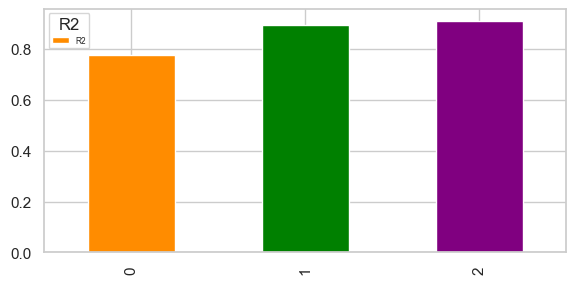

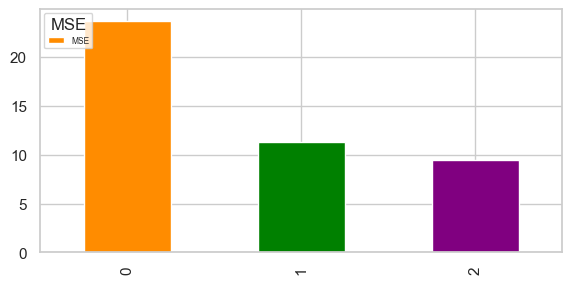

In [687]:
colors=['darkorange','green', 'purple']
labels=['Linear Regression', 'Random Forest Reg.', 'XGBoost']

resultados['R2'].plot(kind="bar", figsize = (6,3), color=colors)
plt.legend(title="R2", loc="upper left", fontsize=6) 
sns.set(style= "whitegrid")
plt.show()

resultados['MSE'].plot(kind="bar", figsize = (6,3), color=colors)
plt.legend(title="MSE", loc="upper left", fontsize=6) 
sns.set(style= "whitegrid")
plt.show()


**Observaciones:**

Dado que el **MSE** nos indica cómo de cerca está el modelo de los puntos reales y el **R2** nos mide la relación lineal entre las variables independientes X el resultado esperado (precio, y), el modelo con mejor se ajusta sigue siendo **XGB Optimization Regressor** con el mejor valor para **R2 (más alto)** y el,ejor valor para **MSE (más bajo)**, seguido de cerca por Random Forest Regressor.

________________________________________________________________________________________________________________________________________________________________________________________________________________________
# Exercici 3
### **Entrena els models utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.**

**Optimization Algoritmos** : al principio, podemos intuir en la elección de los mejores perparámetros para nuestro modelo,después hacerlo a través de algoritmos de optimización. 

Los dos más comunes son **Grid Search** y **Random Search**.

* Se usará **GridSearchCV**, que es una técnica semejante al cross-validation para encontrar los valores de los hyperparametros optimos de un set de parámetros. Se hace un grid para ajustar los parámetros de los modelos de aprendizaje automatico.  Después de definir el modelo y los parámetros, se extraen los mejores parámetros y se hacen predicciones. Se usa para la definición de los hiperparámetros. 
* Es una herramienta de búsqueda exhaustiva de cada combinación de valores de parámetros especificados. Por ejemplo, si especificamos 2 valores para profundidad máxima y 3 para n_estimadores, Grid Search iterará sobre 6 combinaciones posibles.

### **3.A) LINEAR REGRESSION**

#### **1. Obtener, definir y aplicar los parametros a los datos de entrenamiento**

In [810]:
# Ajustar hiperparàmetres dels models d'aprenentatge auto.

from sklearn.model_selection import GridSearchCV 

In [811]:
# llamamos los parámetros por defecto del modelo LinearRegression
l_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

#### **2. Optimizar parámetros**

In [812]:
# Definimos los valores de los parámetros que nos interesan evaluar

l_reg_param = {'fit_intercept':(True, False),
           'n_jobs':(-1, None, 1),
           'positive':(True, False)}

# Usamos GridSearchCV obtener los mejores parámetros con losque entrenar la instancia

l_reg_grid = GridSearchCV(LinearRegression(), l_reg_param,cv=5)
l_reg_grid.fit(X_train, y_train)

print("Los mejores parámetros para el LinearRegression son: \n", l_reg_grid.best_params_)

Los mejores parámetros para el LinearRegression son: 
 {'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [813]:
# Ajustamos los mejores parámetros obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.

y_predict_l_reg1 = l_reg_grid.predict(X_test)

#### **3. Comparamos la precisión del modelo con los parametros por defecto y optimizados**

In [814]:
print('Mejor resultado durante el entreno:', (l_reg_grid.best_score_).round(3))


Mejor resultado durante el entreno: 0.698


In [815]:
# recordamos los valores de MSE y R2 del ejercicio 1 (con parámetros por defecto)

print('R2 de Regresión Linear por defecto :', r2_l_reg.round(3)) 
print('MSE de Regresión Linear por defecto :', mse_l_reg.round(3),'\n\n')


# Obtenenmos los valores de MSE y R2 tras optimización :

mse_l_reg1 = mean_squared_error(y_test, y_predict_l_reg1 )
score_l_reg1= r2_score(y_test, y_predict_l_reg1 )

print("R2 de Regresión Linear optimizado : {} ".format(round((score_l_reg1), 3)))
print("MSE de Regresión Linear optimizado : %.2f" % (mse_l_reg1),'\n')
print("RMSE de Regresión Linear optimizado: %.2f" % (mse_l_reg1**(0.5)))
print("Exactitud con de Regresión Linear optimizado: {} %".format(round((score_l_reg1*100),2)))

R2 de Regresión Linear por defecto : 0.71
MSE de Regresión Linear por defecto : 30.834 


R2 de Regresión Linear optimizado : 0.777 
MSE de Regresión Linear optimizado : 23.73 

RMSE de Regresión Linear optimizado: 4.87
Exactitud con de Regresión Linear optimizado: 77.67 %


* Se observa que el ajuste paramétrico que se pudo hacer fue muy poco y **no hay mejora**.

* Usando otras fórmuas para encontrar dichos valores, también da los mismos resultados.

### **3.B) RANDOM FOREST**

#### **1. Obtener, definir y aplicar parametros**

In [694]:
# los parámetros por defecto del modelo
r_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

#### **2. Optimizar parámetros**

In [695]:
# Definimos los valores de los parámetros que nos interesan evaluar

r_forest_param = {'n_estimators': [50, 100, 150],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

# Usamos GridSearchCV obtener los mejores parámetros con losque entrenar la instancia

r_forest_grid = GridSearchCV(RandomForestRegressor(random_state = 3), r_forest_param, cv=5)
r_forest_grid.fit(X_train, y_train)

print("Los mejores parámetros para el RandomForestRegression son: \n", r_forest_grid.best_params_)

Los mejores parámetros para el RandomForestRegression son: 
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [696]:
# Ajustamos los mejores parámetros obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.

y_predict_r_forest1 = r_forest_grid.predict(X_test)

#### **3. Comparamos la precisión del modelo con los parametros por defecto y optimizados**

In [697]:
# recordamos los valores obtenidos del modelo por defecto :

print('R2 Random Forest por defecto :', r2_r_forest.round(3)) 
print('MSE Random Forest por defecto :', mse_r_forest.round(3),'\n\n')


# valores obtenidos del modelo optimizado:

mse_r_forest1 = mean_squared_error(y_test, y_predict_r_forest1)
score_r_forest1 = r2_score(y_test, y_predict_r_forest1)

print("R2 de Random Forest optimizado : {} ".format(round((score_r_forest1 ), 3)))
print("MSE de Random Forest optimizado : %.2f" % (mse_r_forest1),'\n')
print("Exactitud con Random Forest optimizado: {} %".format(round((score_r_forest1 *100),2)))
print("RMSE de Random Forest optimizado : %.2f" % (mse_r_forest1**0.5),'\n')

R2 Random Forest por defecto : 0.894
MSE Random Forest por defecto : 11.284 


R2 de Random Forest optimizado : 0.902 
MSE de Random Forest optimizado : 10.37 

Exactitud con Random Forest optimizado: 90.24 %
RMSE de Random Forest optimizado : 3.22 



Podemos ver queen el caso de Random Forest Regressor, el modelo ha mejorado con los nuevos parámetros.

### **3.C) XGBoost REGRESSOR**

#### **1. Obtener, definir y aplicar parametros**

El **boosting** es un concepto de aprendizaje por conjuntos en orden secuencial. Es un proceso que combina decisiones de múltiples sobre modelos subyacentes y utiliza una técnica de votación para determinar la predicción final. Utiliza el resultado del modelo anterior como entrada para el siguiente. En lugar de entrenar modelos por separado, la potenciación entrena los modelos secuencialmente, entrenando cada nuevo modelo para corregir los errores de los anteriores. En cada iteración (ronda), a los resultados predichos correctamente se les asigna un peso menor, y a los que se predijeron erróneamente un peso más alto. A continuación, utiliza un promedio ponderado para producir un resultado final.

In [816]:
# build a basic XGBoost model without tuning Without hyperparameter tuning
import xgboost as xgb

xgbr1 = xgb.XGBRegressor(objective='reg:squarederror')  #Our XGBoost model

# los parámetros por defecto del modelo
xgbr1.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [817]:
xgbr1.fit(X_train,y_train)
y_predict_xgbr1 = xgbr1.predict(X_test)

In [818]:
#Calculate and print the RMSE and the accuracy of our model.
mse_xgbr1 = mean_squared_error(y_test, y_predict_xgbr1)
score_xgbr1 = r2_score(y_test, y_predict_xgbr1)

print("R2 con XGBoost REGRESSOR : {} ".format(round((score_xgbr1), 3)))
print("MSE con XGBoost REGRESSOR : %.2f" % (mse_xgbr1), '\n')
print("Exactitud con XGBoost REGRESSOR : {} %".format(round((score_xgbr1*100), 2)))
print("RMSE de XGBoost REGRESSOR : %.2f" % (mse_xgbr1**0.5),'\n')

R2 con XGBoost REGRESSOR : 0.911 
MSE con XGBoost REGRESSOR : 9.42 

Exactitud con XGBoost REGRESSOR : 91.13 %
RMSE de XGBoost REGRESSOR : 3.07 



#### **2. Optimizar parámetros**

**Ajuste de hiperparámetros XGBoost:**

* Comenzar por optimizar max_profundidad y n_estimators. Luego seguir con learning_rate y aumentarlo para acelerar el modelo sin disminuir el rendimiento.
* Si se vuelve más rápido sin perder rendimiento, se puede aumentar el número de n_estimadores para intentar aumentar el rendimiento.


In [819]:
params = { 'max_depth': [6,10],
           'learning_rate': [0.01, 0.08],
           'colsample_bylevel': [0.3, 0.4],
         }

xgbr2 = xgb.XGBRegressor(seed=50)

xgbr_grid2 = GridSearchCV(estimator=xgbr2, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
xgbr_grid2.fit(X_train, y_train)

print("Los mejores parámetros para el RandomForestRegression son: \n", xgbr_grid2.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Los mejores parámetros para el RandomForestRegression son: 
 {'colsample_bylevel': 0.3, 'learning_rate': 0.08, 'max_depth': 6}


In [820]:
# Ajustamos los mejores parámetros obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.

y_predict_xgb2 = xgbr_grid2.predict(X_test)

In [821]:
# valores obtenidos del modelo optimizado:

mse_xgb2  = mean_squared_error(y_test, y_predict_xgb2)
score_xgb2 = r2_score(y_test, y_predict_xgb2)

print("R2 de XGBoost REGRESSOR optimiz. 1 : {} ".format(round((score_xgb2), 3)))
print("MSE de XGBoost REGRESSOR optimiz. 1 : %.2f" % (mse_xgb2),'\n')
print("Exactitud con XGBoost REGRESSOR optimiz.1 : {} %".format(round((score_xgb2*100),2)))
print("RMSE de XGBoost REGRESSOR optimiz. 1 : %.2f" % (mse_xgb2**0.5),'\n')

R2 de XGBoost REGRESSOR optimiz. 1 : 0.915 
MSE de XGBoost REGRESSOR optimiz. 1 : 8.98 

Exactitud con XGBoost REGRESSOR optimiz.1 : 91.55 %
RMSE de XGBoost REGRESSOR optimiz. 1 : 3.00 



* Vemos que de momento el modelo  XGBoost aún puede mejorar un poco más. 

In [822]:
# With hyperparameter tuning
import xgboost as xgb
xgbr3 = xgb.XGBRegressor(objective='reg:squarederror',
                        random_state=50,
                        max_depth=6,
                        learning_rate = 0.08,
                        n_estimators = 500,
                        colsample_bylevel = 0.4,
                        reg_alpha = 1,
                        subsample = 1,
                       )

xgbr3.fit(X_train, y_train)
y_predict_xgb3 = xgbr3.predict(X_test)

mse_xgb3 = mean_squared_error(y_test, y_predict_xgb3)
score_xgb3 = r2_score(y_test,y_predict_xgb3)

print("R2 de XGBoost REGRESSOR optimiz. 2 : {} ".format(round((score_xgb3), 3)))
print("MSE de XGBoost REGRESSOR optimiz. 2 : %.2f" % (mse_xgb3),'\n')
print("Exactitud con XGBoost REGRESSOR optimiz.2 : {} %".format(round((score_xgb3*100),2)))
print("RMSE de XGBoost REGRESSOR optimiz. 2 : %.2f" % (mse_xgb3**0.5),'\n')

R2 de XGBoost REGRESSOR optimiz. 2 : 0.929 
MSE de XGBoost REGRESSOR optimiz. 2 : 7.50 

Exactitud con XGBoost REGRESSOR optimiz.2 : 92.94 %
RMSE de XGBoost REGRESSOR optimiz. 2 : 2.74 



* Se **crea una fórmula para ver donde durante el entreno, se producen los mejores resultados con XGBoost** (se emplea éste para ver hasta donde puede llegar de preciso )
* Haremos caso a los parámetros de **"random state"** que van a salir y los pondremos a prueba.

In [823]:
mse_dict={}  #Root mean square dictionary
acc_dict={}  #Accuracy dictionary
for n in range(100):
    xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                            random_state=n,
                            max_depth=6,
                            learning_rate = 0.08,
                            n_estimators = 500,
                            colsample_bylevel = 0.4,
                            reg_alpha = 1
                           )
    xgbr.fit(X_train, y_train)
    y_pred = xgbr.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    score=r2_score(y_test, y_pred)
    mse_dict.update({n:mse**(1/2.0)})
    acc_dict.update({n:round((score*100),2)})

RMSE is lowest at 2.616 for random state [20] 


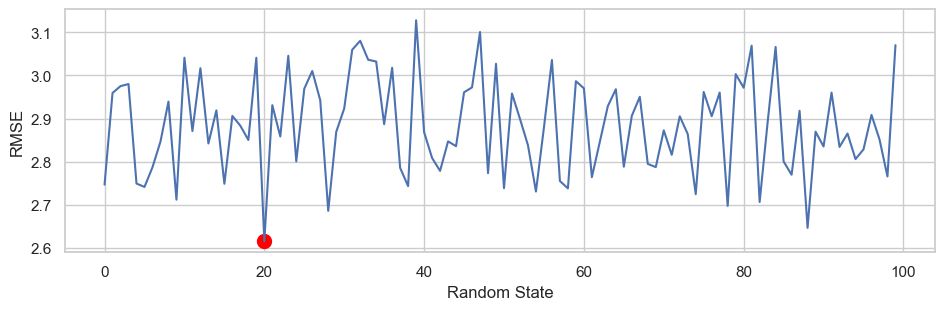

Accuracy is highest at 93.56 % for random state [20] 


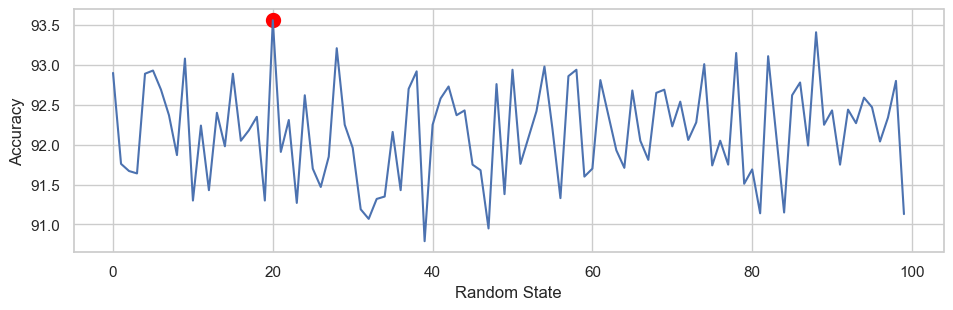

In [834]:
#Mean Square Error
lowest=min(mse_dict.values())
res = [key for key in mse_dict if mse_dict[key] == lowest]
mse_list=mse_dict.items()
k,v = zip(*mse_list) 
print("RMSE is lowest at {} for random state {} ".format(round((lowest),3),res))
#Plot RMSE values
plt.figure(figsize=(10,3))
plt.plot(k,v)
plt.scatter(res,lowest,color="red",lw=5)
plt.xlabel("Random State")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

#Accuracy
highest=max(acc_dict.values())
res1= [key for key in acc_dict if acc_dict[key] == highest]
acc_list=acc_dict.items()
k1,v1=zip(*acc_list)
print("Accuracy is highest at {} % for random state {} ".format(highest,res1))
#Plot Accuracy values
plt.figure(figsize=(10,3))
plt.plot(k1,v1)
plt.scatter(res1,highest,color="red",lw=5)
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

* Por última instancia, vemos que el modelo con XGBRegressor sigue mejorando.
* Haremos caso a los parámetros de **"random state=20"** que van a salir y los probamos a ver cuál es la mejora : vemos que se obtienen valores muy buenos, de **R2 = 0.936 y MSE = 6,84**

In [837]:
xgbr4 = xgb.XGBRegressor(objective='reg:squarederror',
                        random_state=20,
                        max_depth=6,
                        learning_rate = 0.08,
                        n_estimators = 500,
                        colsample_bylevel = 0.4,
                        reg_alpha = 1,
                        subsample = 1,
                       )

xgbr4.fit(X_train, y_train)
y_predict_xgb4 = xgbr4.predict(X_test)

mse_xgb4 = mean_squared_error(y_test, y_predict_xgb4)
score_xgb4 = r2_score(y_test,y_predict_xgb4)

print("R2 de XGBoost REGRESSOR optimiz. 2 : {} ".format(round((score_xgb4), 3)))
print("MSE de XGBoost REGRESSOR optimiz. 2 : %.2f" % (mse_xgb4),'\n')
print("Exactitud con XGBoost REGRESSOR optimiz.2 : {} %".format(round((score_xgb4*100),2)))
print("RMSE de XGBoost REGRESSOR optimiz. 2 : %.2f" % (mse_xgb4**0.5),'\n')

R2 de XGBoost REGRESSOR optimiz. 2 : 0.936 
MSE de XGBoost REGRESSOR optimiz. 2 : 6.84 

Exactitud con XGBoost REGRESSOR optimiz.2 : 93.56 %
RMSE de XGBoost REGRESSOR optimiz. 2 : 2.62 



#### **3. Comparamos la precisión del modelo con los parametros por defecto y optimizados**

* Hemos podido ver las cifras en cada fase y el modelo que mejor predice y que también mejor se ajustsa al original, es **XGB Boost Regressor**, que ha mejorado con cada intento. 
* El Random Forest lo siguede muy cerca, mientras que Linear regressionno se ha podido mejorar. 

In [838]:
# Compararmos los resultados
resultados_optim = pd.DataFrame(data = 
                          [['Linear Regression', r2_l_reg, mse_l_reg, score_l_reg1, mse_l_reg1], 
                           ['Random Forest Reg.', r2_r_forest, mse_r_forest, score_r_forest1, mse_r_forest1], 
                           ['XGBoost Regressor', r2_xgb, mse_xgb, score_xgb4, mse_xgb4]], 
                          columns = ['Modelo', 'R2', 'MSE', 'R2 optim', 'MSE optim'])
resultados_optim.round(3)

,Modelo,R2,MSE,R2 optim,MSE optim
0,Linear Regression,0.710,30.834,0.777,23.729
1,Random Forest Reg.,0.894,11.284,0.830,18.046
2,XGBoost Regressor,0.911,9.425,0.936,6.842


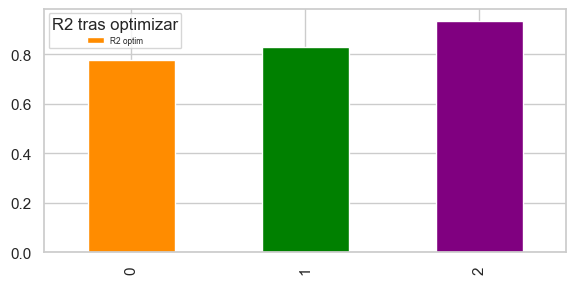

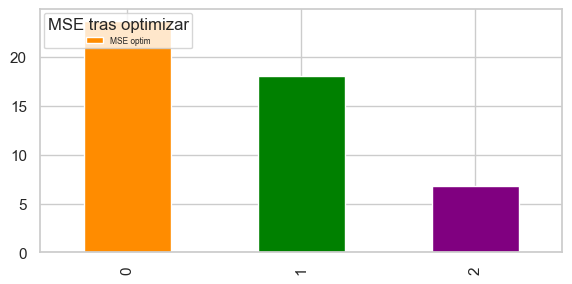

In [840]:
colors=['darkorange','green', 'purple']
labels=['Linear Regression', 'Random Forest Reg.', 'XGBoost']

resultados_optim['R2 optim'].plot(kind="bar", figsize = (6,3), color=colors)
plt.legend(title="R2 tras optimizar", loc="upper left", fontsize=6) 
sns.set(style= "whitegrid")
plt.show()

resultados_optim['MSE optim'].plot(kind="bar", figsize = (6,3), color=colors)
plt.legend(title="MSE tras optimizar", loc="upper left", fontsize=6) 
sns.set(style= "whitegrid")
plt.show()


### **Visualización de los datos con cada modelo**

* Hacemos unos gráficos para visualizar el efecto de cada modelo sobre los precios (estimados vs reales) 
* Otro gráfico para ver qué tanto se ajusta cada modelo a los resultados deseados (testing)



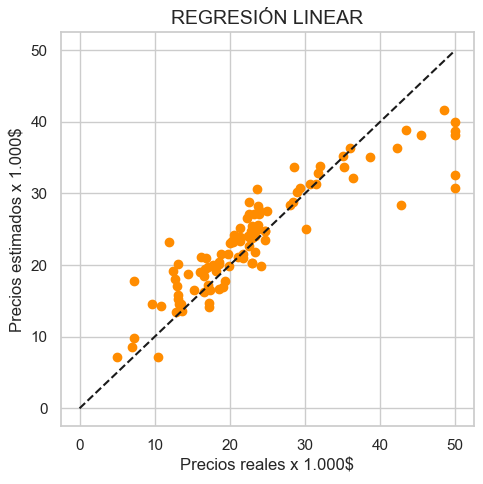

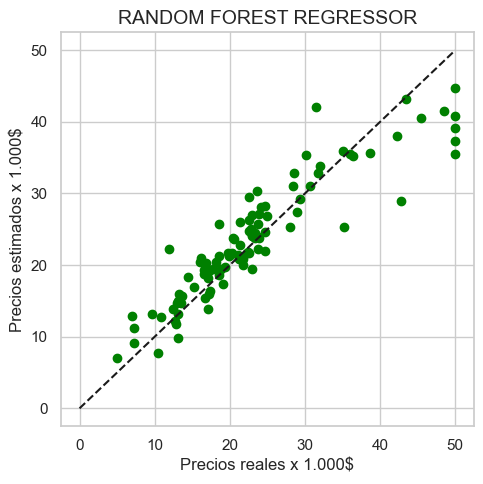

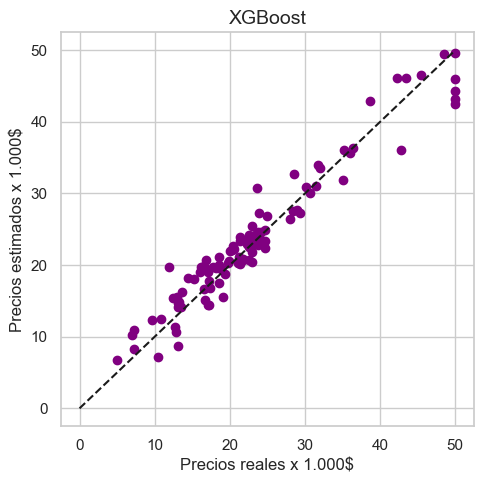

In [841]:
# -------------- Gráfico de la REGRESIÓN LINEAR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, y_predict_l_reg1, color='darkorange') 
plt.plot([0, 50], [0, 50], '--k')
plt.title("REGRESIÓN LINEAR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

# -------------- Gráfico de RANDOM FOREST REGRESSOR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, y_predict_r_forest1, color='green')
plt.plot([0, 50], [0, 50], '--k')
plt.title("RANDOM FOREST REGRESSOR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

# ---------------- Gráfico de XGBoost --------------------------------- 
plt.figure(figsize=(5, 5))
plt.scatter(expected, y_predict_xgb4, color='purple')
plt.plot([0, 50], [0, 50], '--k')
plt.title("XGBoost", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

**Observaciones:**


Podemos ver en todos los modelos que, como se comentaba en la sección anterior, el ajute a la línea de tendencia empeora hacia los precios más altos y en el caso de **Regresión Linear**, le cuesta predecir a partir de 40 k a 50k $, pero la estimación es muy buena con **Random Forest Regressor** y sobretodo **XGB Optimization Regressor** son los modelos de regresión que mejor se ajustan a la distribucióon de los datos reales del y_test. 
Desde el cuarto intento de parametrización, podemos decir que **XGBoot el es más adaptable y mejor modelo** para este conjunto de datos. 

________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Exercici 4
### **Compara el seu rendiment emprant l’aproximació train/test o emprant totes les dades (validació interna / cross validation)**

Para elo utilizaremos la **validación cruzada** (cross_val_score), que es una función que nos permite ver la métrica de un modelo en diferentes divisiones de los datos. En nuestro caso al ser un problema de regresión, utilizaremos cmo scoring los valores neg_mean_squared_error y r2 para comparar los resultados.

 XGBRegressor

### **4.A) LINEAR REGRESSION**

In [842]:
# Rendiment Linear Regression
scores_l_reg = cross_val_score(l_reg, X, y,cv=5, scoring ='r2')
display(scores_l_reg)
print('El máximo rendimiento R2 :', max(scores_l_reg).round(3), '\n\n')

neg_mean_l_reg = cross_val_score(l_reg, X, y,cv=5, scoring ='neg_mean_squared_error')
display(neg_mean_l_reg)
print('El máximo rendimiento en neg_mean_squared_error :', max(neg_mean_l_reg).round(3))

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

El máximo rendimiento R2 : 0.714 




array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

El máximo rendimiento en neg_mean_squared_error : -12.46


### **4.B) RANDOM FOREST**

sobre "scoring='neg_mean_squared_error' " en random forest : cuánto más alto mejor. Por lo tanto, las métricas que miden la distancia entre el modelo y los datos, como metrics.mean_squared_error, están disponibles como neg_mean_squared_error y devuelven el valor negado de la métrica.

In [843]:
# Rendiment Random Forest Regression
scores_r_forest = cross_val_score(r_forest, X, y, cv=5, scoring= 'r2' )
display(scores_r_forest)
print('El máximo rendimiento R2 :', max(scores_r_forest).round(3), '\n\n')

neg_mean_r_forest = cross_val_score(r_forest, X, y,cv=5, scoring ='neg_mean_squared_error')
display(neg_mean_r_forest)
print('\n', 'El máximo rendimiento en neg_mean_squared_error :', max(neg_mean_r_forest).round(3))

array([0.76257477, 0.84971792, 0.76940767, 0.47939685, 0.27813834])

El máximo rendimiento R2 : 0.85 




array([ -8.1995266 , -13.68119272, -18.46749454, -45.66306602,
       -19.19308655])


 El máximo rendimiento en neg_mean_squared_error : -8.2


### **4.C) XGBoost REGRESSOR**

In [845]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

scores_xgbr4 = cross_val_score(xgbr4, X, y, cv=5)
display(scores_xgbr4)
print('El máximo rendimiento para  XGBRegressor ha sido :', max(scores_xgbr4).round(3), '\n')

neg_mean_xgbr4 = cross_val_score(xgbr4, X, y,cv=5, scoring ='neg_mean_squared_error')
display(neg_mean_xgbr4)
print('El máximo rendimiento en neg_mean_squared_error :', max(neg_mean_xgbr4).round(3))

array([0.74691957, 0.80793264, 0.76851404, 0.59709317, 0.45158145])

El máximo rendimiento para  XGBRegressor ha sido : 0.808 



array([ -8.74018196, -17.48518898, -18.53906336, -35.33970402,
       -14.58152612])

El máximo rendimiento en neg_mean_squared_error : -8.74


________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Exercici 5
### **No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.**

Como "RM" (número de estancias en la casa, que en Norteamérica incluye no solo los dormitorios sino que también el salon-comedor, cocina y donde un baño vale por 0.5 "estancia") está muy vinculado al precio ; intentamos de nuevo los pasos realizados entre el ejercicio 1 y el 4, pero excluyendo de los cálculos a la columna "RM".

In [846]:
data = load_boston()

In [847]:
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(data.data), columns=data.feature_names)
y=data.target


In [848]:
# creamos dataset y columna de los labels sin la variable RM (# de habitaciones) 

_X = X.drop(['RM'], axis = 1) 
_y = boston['MEDV']


In [850]:
X=_X
y=_y

In [851]:
_boston = pd.concat([_X, _y], axis=1)

In [852]:
X_train, X_test, y_train, y_test = train_test_split(_X, _y,
                                                    shuffle=True, stratify=X['CHAS']>0, test_size=0.2, random_state=2)

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 12)

(404,)

(102, 12)

(102,)

### **5.A) LINEAR REGRESSION**

**Importar, ajustar, predecir, visualizar y medir el rendimiento de un modelo**

In [853]:
from sklearn.linear_model import LinearRegression

# cargamos el modelo, hacemos el ajuste
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

# making predictions on the test data (plot)
predicted_l_reg = l_reg.predict(X_test)
expected = y_test

# calculamos la exactitud del modelo, qué tanto se ajusta a la realidad del rendimiento que le pedimos.
accuracy_TRAINING_l_reg = l_reg.score(X_train, y_train).round(2)*100
accuracy_TESTING_l_reg = l_reg.score(X_test, y_test).round(2)*100
print('Precisión del TRAINING con Regression Linear : ',l_reg.score(X_train, y_train).round(2)*100)
print('Precisión del TESTING con Regression Linear : ', l_reg.score(X_test, y_test).round(2)*100)


Precisión del TRAINING con Regression Linear :  69.0
Precisión del TESTING con Regression Linear :  71.0


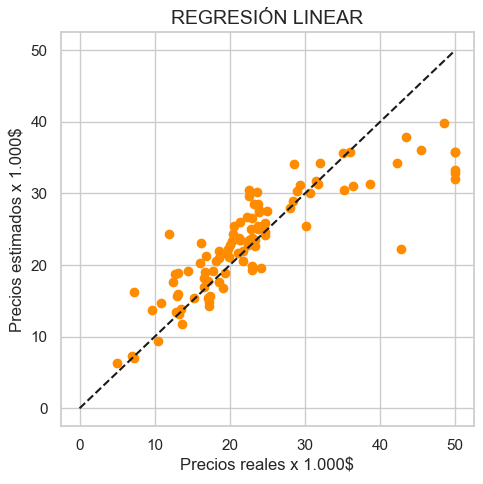

In [854]:
# -------------- Gráfico de la REGRESIÓN LINEAR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, predicted_l_reg, color='darkorange') 
plt.plot([0, 50], [0, 50], '--k')
plt.title("REGRESIÓN LINEAR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()


In [855]:
# Cargamos la medida MSE para evaluar los modelos 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [856]:
# R2
r2_l_reg = r2_score(expected, predicted_l_reg)

# MSE
mse_l_reg = mean_squared_error(expected, predicted_l_reg)
print('R2 Linear regression :', r2_l_reg.round(3)) 
print('MSE Linear regression :', mse_l_reg.round(3))


R2 Linear regression : 0.71
MSE Linear regression : 30.834


In [857]:
# Ajustar hiperparàmetres dels models d'aprenentatge auto.

from sklearn.model_selection import GridSearchCV 

In [858]:
# llamamos los parámetros por defecto del modelo LinearRegression
l_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [859]:
# Definimos los valores de los parámetros que nos interesan evaluar

l_reg_param = {'fit_intercept':(True, False),
           'n_jobs':(-1, None, 1),
           'positive':(True, False)}

# Usamos GridSearchCV obtener los mejores parámetros con losque entrenar la instancia

l_reg_grid = GridSearchCV(LinearRegression(), l_reg_param,cv=5)
l_reg_grid.fit(X_train, y_train)

print("Los mejores parámetros para el LinearRegression son: \n", l_reg_grid.best_params_)


Los mejores parámetros para el LinearRegression son: 
 {'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [860]:
# Ajustamos los mejores parámetros obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.

y_predict = l_reg_grid.predict(X_test)

In [861]:
print('Mejor resultado durante el entreno:', (l_reg_grid.best_score_).round(3))


Mejor resultado durante el entreno: 0.662


In [862]:
# recordamos los valores de MSE y R2 del ejercicio 1 (con parámetros por defecto)

print('R2 de Regresión Linear por defecto :', r2_l_reg.round(3)) 
print('MSE de Regresión Linear por defecto :', mse_l_reg.round(3),'\n\n')


# Obtenenmos los valores de MSE y R2 tras optimización :

mse = mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)

print("R2 de Regresión Linear optimizado : {} ".format(round((score), 3)))
print("MSE de Regresión Linear optimizado : %.2f" % (mse),'\n')
print("RMSE de Regresión Linear optimizado: %.2f" % (mse**(0.5)))
print("Exactitud con de Regresión Linear optimizado: {} %".format(round((score*100),2)))

R2 de Regresión Linear por defecto : 0.71
MSE de Regresión Linear por defecto : 30.834 


R2 de Regresión Linear optimizado : 0.71 
MSE de Regresión Linear optimizado : 30.83 

RMSE de Regresión Linear optimizado: 5.55
Exactitud con de Regresión Linear optimizado: 70.98 %


* Se observa que el ajuste paramétrico que se pudo hacer fue muy poco y no hay mejora 

* Usando otras fórmuas para encontrar dichos valores, también da los mismos resultados.

### **5.B) RANDOM FOREST REGRESSOR**

Random Forest Regressor es un algoritmo de aprendizaje automático que utiliza un conjunto de árboles de decisión para realizar tareas de regresión. Ajusta una serie de árboles en diferentes submuestras de los datos y promedia sus predicciones para mejorar la precisión y evitar el sobreajuste, o overfitting. El tamaño de la submuestra y el número de árboles se pueden controlar mediante parámetros. Es una técnica flexible y fácil de usar que también puede ser utilizada para la clasificación.

En el aprendizaje automático funcionan bien en conjuntos de datos grandes y complejos. Pueden dar un alto ratio de precisión y podemos mejorar aún más estos resultados.



In [863]:
from sklearn.ensemble import RandomForestRegressor

# cargamos el modelo, haciendo el ajuste en la misma línea 
r_forest = RandomForestRegressor(random_state = 3).fit(X_train, y_train)

# hacer predicciones sobre los datos del TEST, basandonos en el X_test
predicted_r_f = r_forest.predict(X_test)
expected = y_test

# calculamos la exactitud del modelo, qué tanto se ajusta a la realidad del rendimiento que le pedimos.
accuracy_TRAINING_r_forest = r_forest.score(X_train, y_train).round(2)*100
accuracy_TESTING_r_forest = r_forest.score(X_test, y_test).round(2)*100

print('Precisión del TRAINING con Random Forest Regression : ',r_forest.score(X_train, y_train).round(2)*100)
print("Precisión del TESTING con Random Forest Regression: ", r_forest.score(X_test, y_test).round(2)*100)

Precisión del TRAINING con Random Forest Regression :  97.0
Precisión del TESTING con Random Forest Regression:  83.0


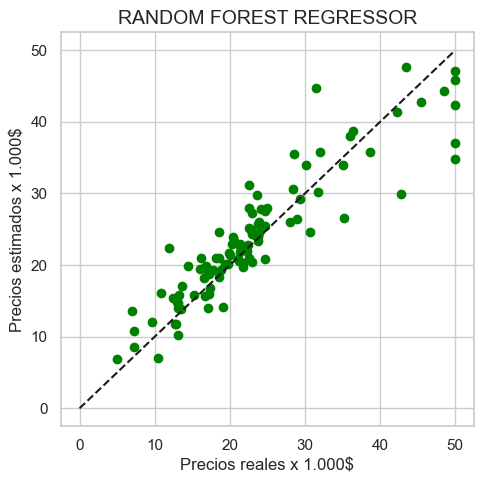

In [864]:
# -------------- Gráfico de RANDOM FOREST REGRESSOR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, predicted_r_f, color='green')
plt.plot([0, 50], [0, 50], '--k')
plt.title("RANDOM FOREST REGRESSOR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()


#### **1. Obtener, definir y aplicar parametros**

In [865]:
# los parámetros por defecto del modelo
r_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

#### **2. Optimizar parámetros**

In [866]:
# Definimos los valores de los parámetros que nos interesan evaluar

r_forest_param = {'n_estimators': [50, 100, 150],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

# Usamos GridSearchCV obtener los mejores parámetros con losque entrenar la instancia

r_forest_grid = GridSearchCV(RandomForestRegressor(random_state = 3), r_forest_param, cv=5)
r_forest_grid.fit(X_train, y_train)

print("Los mejores parámetros para el RandomForestRegression son: \n", r_forest_grid.best_params_)

Los mejores parámetros para el RandomForestRegression son: 
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [867]:
# Ajustamos los mejores parámetros obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.

y_predict_r_forest1 = r_forest_grid.predict(X_test)

#### **3. Comparamos la precisión del modelo con los parametros por defecto y optimizados**

In [868]:
# recordamos los valores obtenidos del modelo por defecto :

print('R2 Random Forest por defecto :', r2_r_forest.round(3)) 
print('MSE Random Forest por defecto :', mse_r_forest.round(3),'\n\n')


# valores obtenidos del modelo optimizado:

mse_r_forest1 = mean_squared_error(y_test, y_predict_r_forest1)
score_r_forest1 = r2_score(y_test, y_predict_r_forest1)

print("R2 de Random Forest optimizado : {} ".format(round((score_r_forest1 ), 3)))
print("MSE de Random Forest optimizado : %.2f" % (mse_r_forest1),'\n')
print("Exactitud con Random Forest optimizado: {} %".format(round((score_r_forest1 *100),2)))
print("RMSE de Random Forest optimizado : %.2f" % (mse_r_forest1**0.5),'\n')

R2 Random Forest por defecto : 0.894
MSE Random Forest por defecto : 11.284 


R2 de Random Forest optimizado : 0.83 
MSE de Random Forest optimizado : 18.05 

Exactitud con Random Forest optimizado: 83.01 %
RMSE de Random Forest optimizado : 4.25 



### **5.C) XGBoost MODEL OPTIMIZATION REGRESSOR**

El algoritmo XGBOost es una implementación optimizada de este método Gradient Boosting. Tiene la mejor combinación de rendimiento de predicción y tiempo de procesamiento en comparación con otros algoritmos. 

In [869]:
import xgboost as xgb

# cargamos el modelo, haciendo el ajuste en la misma línea 
xgb = xgb.XGBRegressor(objective='reg:squarederror').fit(X_train, y_train)

# hacer predicciones sobre los datos del TEST, basandonos en el X_test
predicted_xgb = xgb.predict(X_test)
expected = y_test

# calculamos la exactitud del modelo, qué tanto se ajusta a la realidad del rendimiento que le pedimos.
accuracy_TRAINING_xgb = xgb.score(X_train, y_train).round(2)*100
accuracy_TESTING_xgb = xgb.score(X_test, y_test).round(2)*100

print('Exactitud deL TRAINING con XGBoost-Model Optimization. : ' , xgb.score(X_train, y_train).round(2)*100)
print("Exactitud del TESTING con XGBoost-Model Optimization: " , xgb.score(X_test, y_test).round(2)*100)

Exactitud deL TRAINING con XGBoost-Model Optimization. :  100.0
Exactitud del TESTING con XGBoost-Model Optimization:  80.0


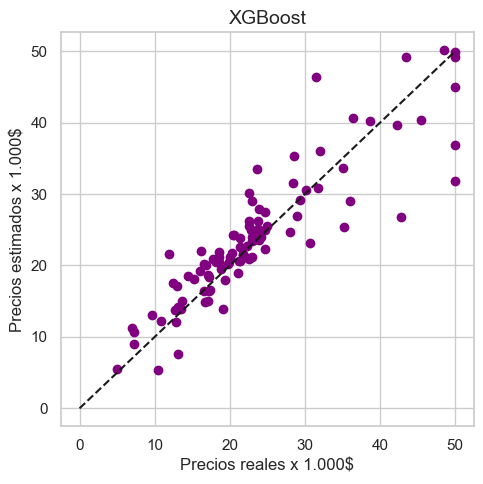

In [870]:
# ---------------- Gráfico de XGBoost --------------------------------- 
plt.figure(figsize=(5, 5))
plt.scatter(expected, predicted_xgb, color='purple')
plt.plot([0, 50], [0, 50], '--k')
plt.title("XGBoost", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

In [871]:
# build a basic XGBoost model without tuning Without hyperparameter tuning
import xgboost as xgb

xgbr1 = xgb.XGBRegressor(objective='reg:squarederror')  #Our XGBoost model

# los parámetros por defecto del modelo
xgbr1.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [872]:
xgbr1.fit(X_train,y_train)
y_predict_xgbr1 = xgbr1.predict(X_test)

In [874]:
#Calculate and print the RMSE and the accuracy of our model.
mse_xgbr1 = mean_squared_error(y_test, y_predict_xgbr1)
score_xgbr1 = r2_score(y_test, y_predict_xgbr1)

print("R2 con XGBoost REGRESSOR : {} ".format(round((score_xgbr1), 3)))
print("MSE con XGBoost REGRESSOR : %.2f" % (mse_xgbr1), '\n')
print("Exactitud con XGBoost REGRESSOR : {} %".format(round((score_xgbr1*100), 2)))
print("RMSE de XGBoost REGRESSOR : %.2f" % (mse_xgbr1**0.5),'\n')

R2 con XGBoost REGRESSOR : 0.804 
MSE con XGBoost REGRESSOR : 20.80 

Exactitud con XGBoost REGRESSOR : 80.42 %
RMSE de XGBoost REGRESSOR : 4.56 



#### **Optimizar parámetros**

**Ajuste de hiperparámetros XGBoost:**

* Comenzar por optimizar max_profundidad y n_estimators. Luego seguir con learning_rate y aumentarlo para acelerar el modelo sin disminuir el rendimiento.
* Si se vuelve más rápido sin perder rendimiento, se puede aumentar el número de n_estimadores para intentar aumentar el rendimiento.


In [875]:
params = { 'max_depth': [6,10],
           'learning_rate': [0.01, 0.08],
           'colsample_bylevel': [0.3, 0.4],
         }

xgbr2 = xgb.XGBRegressor(seed=50)

xgbr_grid2 = GridSearchCV(estimator=xgbr2, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
xgbr_grid2.fit(X_train, y_train)

print("Los mejores parámetros para el RandomForestRegression son: \n", xgbr_grid2.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Los mejores parámetros para el RandomForestRegression son: 
 {'colsample_bylevel': 0.3, 'learning_rate': 0.08, 'max_depth': 6}


In [876]:
# Ajustamos los mejores parámetros obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.

y_predict_xgb2 = xgbr_grid2.predict(X_test)

In [877]:
# valores obtenidos del modelo optimizado:

mse_xgb2  = mean_squared_error(y_test, y_predict_xgb2)
score_xgb2 = r2_score(y_test, y_predict_xgb2)

print("R2 de XGBoost REGRESSOR optimiz. 1 : {} ".format(round((score_xgb2), 3)))
print("MSE de XGBoost REGRESSOR optimiz. 1 : %.2f" % (mse_xgb2),'\n')
print("Exactitud con XGBoost REGRESSOR optimiz.1 : {} %".format(round((score_xgb2*100),2)))
print("RMSE de XGBoost REGRESSOR optimiz. 1 : %.2f" % (mse_xgb2**0.5),'\n')

R2 de XGBoost REGRESSOR optimiz. 1 : 0.845 
MSE de XGBoost REGRESSOR optimiz. 1 : 16.46 

Exactitud con XGBoost REGRESSOR optimiz.1 : 84.51 %
RMSE de XGBoost REGRESSOR optimiz. 1 : 4.06 



* Vemos que de momento el modelo ya no mejora más. 

In [774]:
# With hyperparameter tuning
import xgboost as xgb
xgbr3 = xgb.XGBRegressor(objective='reg:squarederror',
                        random_state=50,
                        max_depth=6,
                        learning_rate = 0.08,
                        n_estimators = 500,
                        colsample_bylevel = 0.4,
                        reg_alpha = 1,
                        subsample = 1,
                       )

xgbr3.fit(X_train, y_train)
y_predict_xgb3 = xgbr3.predict(X_test)

mse_xgb3 = mean_squared_error(y_test, y_predict_xgb3)
score_xgb3 = r2_score(y_test,y_predict_xgb3)

print("R2 de XGBoost REGRESSOR optimiz. 2 : {} ".format(round((score_xgb3), 3)))
print("MSE de XGBoost REGRESSOR optimiz. 2 : %.2f" % (mse_xgb3),'\n')
print("Exactitud con XGBoost REGRESSOR optimiz.2 : {} %".format(round((score_xgb3*100),2)))
print("RMSE de XGBoost REGRESSOR optimiz. 2 : %.2f" % (mse_xgb3**0.5),'\n')

R2 de XGBoost REGRESSOR optimiz. 2 : 0.84 
MSE de XGBoost REGRESSOR optimiz. 2 : 17.04 

Exactitud con XGBoost REGRESSOR optimiz.2 : 83.96 %
RMSE de XGBoost REGRESSOR optimiz. 2 : 4.13 



### **Visualización de los datos con cada modelo**

* Hacemos unos gráficos para visualizar el efecto de cada modelo sobre los precios
* Otro gráfico para ver qué tanto se ajusta cada modelo a los resultados deseados (testing)



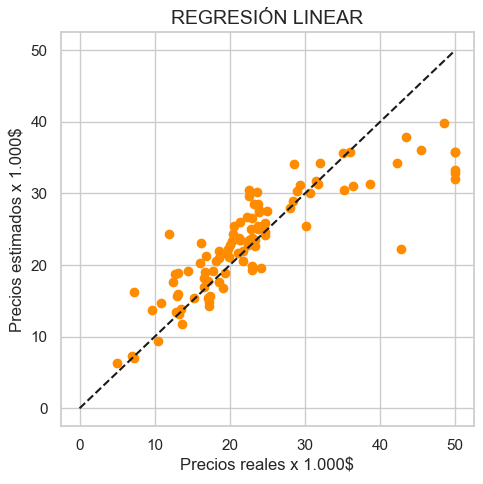

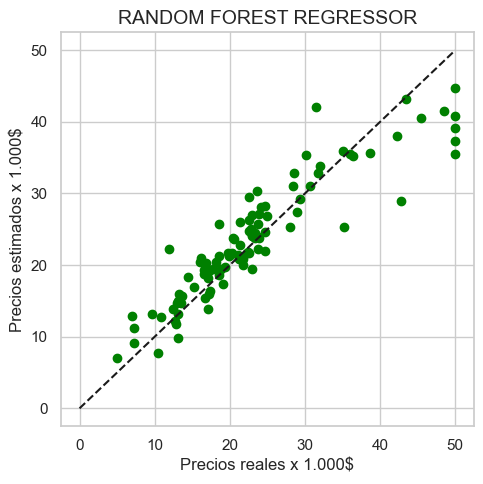

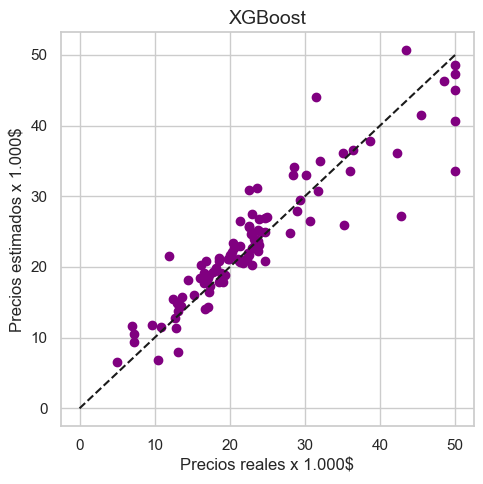

In [895]:
# -------------- Gráfico de la REGRESIÓN LINEAR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, predicted_l_reg, color='darkorange') 
plt.plot([0, 50], [0, 50], '--k')
plt.title("REGRESIÓN LINEAR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

# -------------- Gráfico de RANDOM FOREST REGRESSOR ------------------

plt.figure(figsize=(5, 5))
plt.scatter(expected, y_predict_r_forest1, color='green')
plt.plot([0, 50], [0, 50], '--k')
plt.title("RANDOM FOREST REGRESSOR", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

# ---------------- Gráfico de XGBoost --------------------------------- 
plt.figure(figsize=(5, 5))
plt.scatter(expected, y_predict_xgb2, color='purple')
plt.plot([0, 50], [0, 50], '--k')
plt.title("XGBoost", fontsize = 14)
plt.axis('tight')
plt.xlabel('Precios reales x 1.000$')
plt.ylabel('Precios estimados x 1.000$')
plt.tight_layout()
plt.show()

### **Comparación de los resultados obtenidos**

In [886]:
# Compararmos los resultados
accuracy = pd.DataFrame(data = 
                          [['Linear Regression', accuracy_TRAINING_l_reg, accuracy_TESTING_l_reg], 
                           ['Random Forest Reg.', accuracy_TRAINING_r_forest, accuracy_TESTING_r_forest], 
                           ['XGBoost Regressor', accuracy_TRAINING_xgb, accuracy_TESTING_xgb]], 
                          columns = ['Modelo', 'Exactitud X_train', 'Exactitud X_test'])
accuracy.head().round(3)

,Modelo,Exactitud X_train,Exactitud X_test
0,Linear Regression,69.0,71.0
1,Random Forest Reg.,97.0,83.0
2,XGBoost Regressor,100.0,80.0


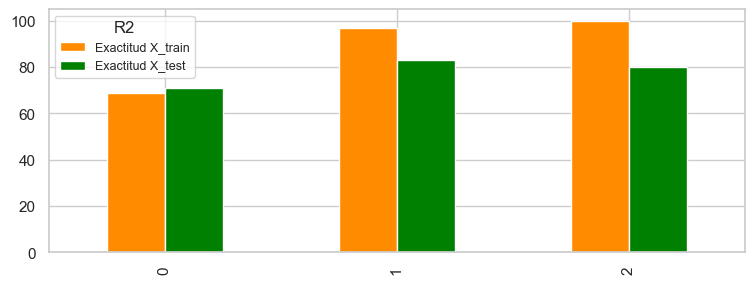

In [887]:
colors=['darkorange','green', 'purple']
labels=['Linear Regression', 'Random Forest Reg.', 'XGBoost']

accuracy.plot(kind="bar", figsize = (8,3), color=colors)
plt.legend(title="R2", loc="upper left", fontsize=9) 
sns.set(style= "whitegrid")
plt.show()


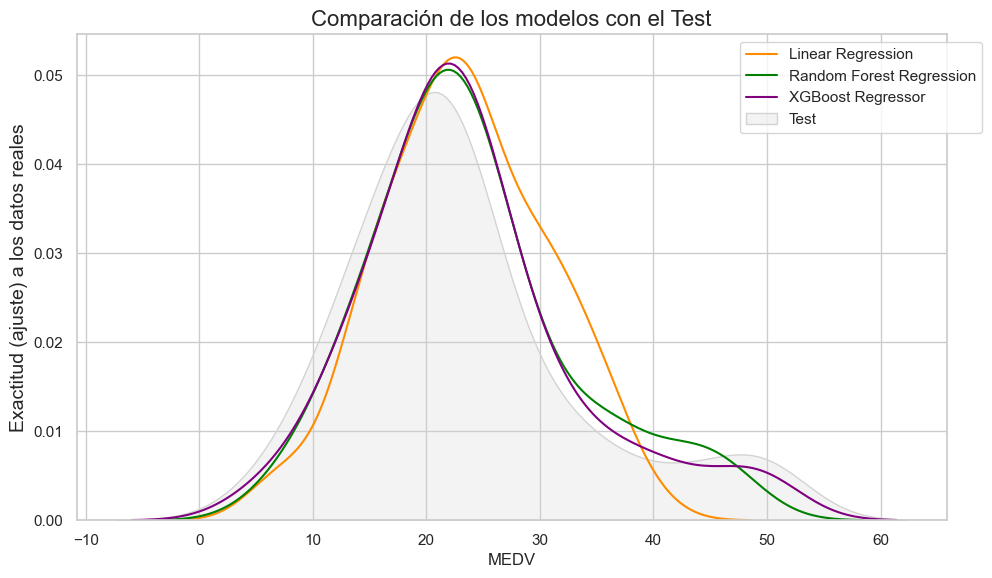

In [888]:
# ------------- Gráfico de precisión de los MODELOS EN CONJUNTO --------------

fig, ax = plt.subplots(figsize=(10,6))
sns.set(style= "whitegrid")
sns.kdeplot(predicted_l_reg, label='Linear Regression', color='darkorange', fill=False)
sns.kdeplot(predicted_r_f, label='Random Forest Regression', color='green', fill=False)
sns.kdeplot(predicted_xgb, label='XGBoost Regressor', color='purple', fill=False)
sns.kdeplot(y_test, label='Test', color="lightgrey", fill=True)
plt.title("Comparación de los modelos con el Test", fontsize = 16)
plt.ylabel('Exactitud (ajuste) a los datos reales', fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [889]:
# Compararmos los resultados
resultados_optim = pd.DataFrame(data = 
                          [['Linear Regression', r2_l_reg, mse_l_reg, score_l_reg1, mse_l_reg1], 
                           ['Random Forest Reg.', r2_r_forest, mse_r_forest, score_r_forest1, mse_r_forest1], 
                           ['XGBoost Regressor', r2_xgb, mse_xgb, score_xgb3, mse_xgb3]], 
                          columns = ['Modelo', 'R2', 'MSE', 'R2 optim', 'MSE optim'])
resultados_optim.round(3)

,Modelo,R2,MSE,R2 optim,MSE optim
0,Linear Regression,0.710,30.834,0.777,23.729
1,Random Forest Reg.,0.894,11.284,0.830,18.046
2,XGBoost Regressor,0.911,9.425,0.929,7.500


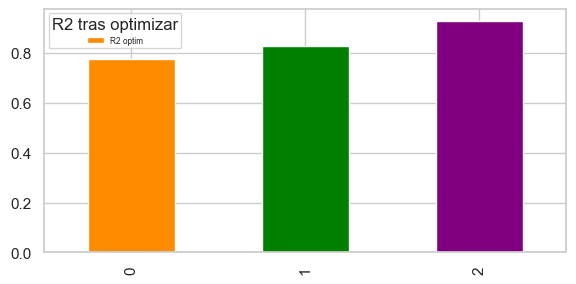

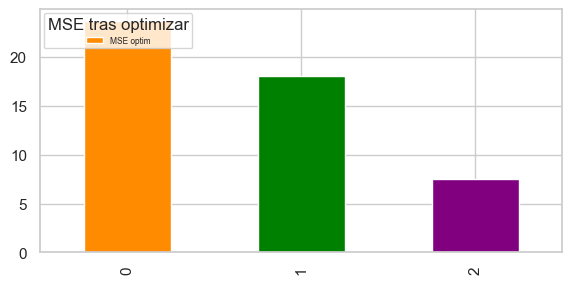

In [890]:
colors=['darkorange','green', 'purple']
labels=['Linear Regression', 'Random Forest Reg.', 'XGBoost']

resultados_optim['R2 optim'].plot(kind="bar", figsize = (6,3), color=colors)
plt.legend(title="R2 tras optimizar", loc="upper left", fontsize=6) 
sns.set(style= "whitegrid")
plt.show()

resultados_optim['MSE optim'].plot(kind="bar", figsize = (6,3), color=colors)
plt.legend(title="MSE tras optimizar", loc="upper left", fontsize=6) 
sns.set(style= "whitegrid")
plt.show()


**Observaciones:**


* Quitar la variable RM hace que las estimaciones sean peores y en la la mitad alta de precios, se alejan mucho de la línea de tendencia, aunque manteniendo las proporciones, menos en en el caso de Regresión Linear, donde el estimado no es simétrico como en los dos otros modelos. Podemos pensar que RM tiene una gran influencia en los precios, y es lógico, puesto que el tamaño o y las estancias son una característica fundamental a la hora de comprar o vender una casa, aunque otros temas, como la ubicación, el estado, la clase social, etc., influyen también.
* Destaca también que en este caso y al contrario de lo que pasa con el primer dataset que contiene RM, las optimizaciones no parecen mejorar el modelo Random Forest y XGBoot. Es decir, que si bien baja un poco y por tanto, mejora R2, en cuanto a la medida MSE, sube mucho.
* Si bien en el Train tienen buenos valores, en el Test no es así.

### **CROSS VALIDATION**

In [891]:
# Rendiment Linear Regression
scores_l_reg = cross_val_score(l_reg, X, y, cv=5, scoring ='r2')
print('\n','El máximo rendimiento R2 para Linear Regression :', max(scores_l_reg).round(3))

neg_mean_l_reg = cross_val_score(l_reg, X, y,cv=5, scoring ='neg_mean_squared_error')
print('\n', 'El máximo rendimiento en neg_mean_squared_error :', max(neg_mean_l_reg).round(3))


 El máximo rendimiento R2 para Linear Regression : 0.615

 El máximo rendimiento en neg_mean_squared_error : -16.672


In [892]:
# Rendiment Random Forest Regression
scores_r_forest = cross_val_score(r_forest, X, y, cv=5, scoring= 'r2' )
print('\n','El máximo rendimiento R2 para Random forest :', max(scores_r_forest).round(3))

neg_mean_r_forest = cross_val_score(r_forest, X, y,cv=5, scoring ='neg_mean_squared_error')
print('\n', 'El máximo rendimiento en neg_mean_squared_error :', max(neg_mean_r_forest).round(3))


 El máximo rendimiento R2 para Random forest : 0.81

 El máximo rendimiento en neg_mean_squared_error : -12.47


In [893]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgbm_reg = XGBRegressor()
scores_xgbr = cross_val_score(xgbm_reg, X, y, cv=5)
print('El máximo rendimiento para  XGBRegressor :', max(scores_xgbr).round(3))

neg_mean_xgbr = cross_val_score(xgbm_reg, X, y,cv=5, scoring ='neg_mean_squared_error')
print('\n', 'El máximo rendimiento en neg_mean_squared_error :', max(neg_mean_xgbr).round(3))

El máximo rendimiento para  XGBRegressor : 0.708

 El máximo rendimiento en neg_mean_squared_error : -16.008


**Conclusiones**
* El test Cross-validation indica que el mejor comportamiento cuando falta la variable RM se encuentra usando Random Forest Regression
* Para cuando se tiene disponible RM, el mejor modelo a utilizar es XGBoot, que presenta valores alto de rendimeinto tanto con o sin parametrización especial. Los tests parametrizados son los que mejores resultados dan, menos en linear regression donde no cambian nada.
